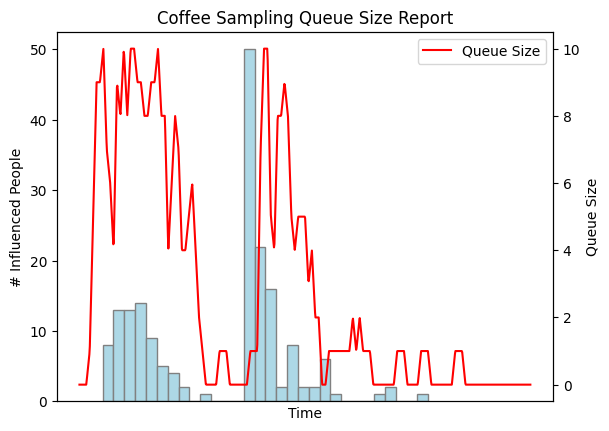

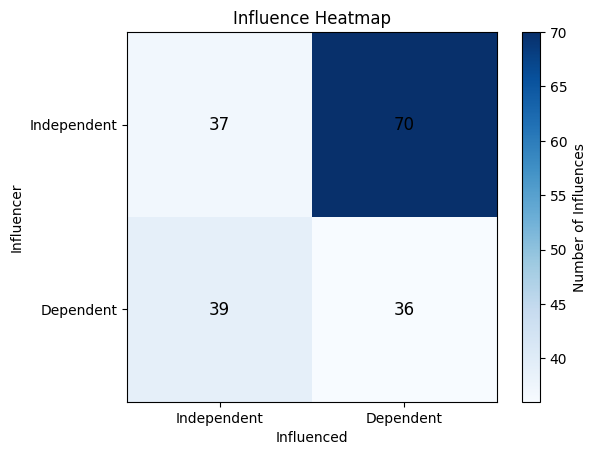

+----------------------------------------------+-------+
|                   Category                   | Count |
+----------------------------------------------+-------+
|    number of independents who got coffee     |  66   |
|     number of dependents who got coffee      |  55   |
| number of independents who gave up on coffee |  14   |
|  number of dependents who gave up on coffee  |  17   |
+----------------------------------------------+-------+


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from tabulate import tabulate

file_path_queue = 'reports/Coffee_SamplingQueueSizeReport.txt'
data_queue = np.loadtxt(file_path_queue, delimiter=':')

time_queue = data_queue[:, 0]
values_queue = data_queue[:, 1]


interpolation_function_queue = interp1d(time_queue, values_queue, kind='linear', fill_value='extrapolate')

new_time_queue = np.linspace(time_queue.min(), time_queue.max(), 1000)
interpolated_values_queue = interpolation_function_queue(new_time_queue)

file_path_event = 'reports/Coffee_EventLogReportCoffee.txt'
data_event = np.genfromtxt(file_path_event, delimiter=' ', dtype=str)

# Extract relevant columns (Time, Influencer, Influenced)
modified_data = [item[:-1] for item in data_event[:, 0]]
time_event = np.array(modified_data).astype(float)
influencer_event = data_event[:, 1]
modified_data = [item[:-1] for item in data_event[:, 0]]
influenced_event = data_event[:, 4]


plt.hist(time_event, bins=30, edgecolor='grey', color='lightblue', label="# Influenced People")
plt.xlabel('Time')
plt.ylabel('# Influenced People')
plt.title('Coffee Sampling Queue Size Report')
plt.xticks([])

plt2 = plt.gca().twinx()
plt2.plot(new_time_queue, interpolated_values_queue, '-', color='red', label="Queue Size")
plt2.set_ylabel('Queue Size')
plt.legend()
plt2.legend()

plt.show()

# Count elements starting with "ind" or "dep"
influencer_values = np.array([1 if influencer.startswith("ind") else 0 for influencer in influencer_event])
influenced_values = np.array([1 if influenced.startswith("ind") else 0 for influenced in influenced_event])


ind_to_ind = np.sum(influencer_values & influenced_values)
ind_to_dep = np.sum(influencer_values & (1-influenced_values))
dep_to_ind = np.sum((1-influencer_values) & influenced_values)
dep_to_dep = np.sum((1-influencer_values) & (1-influenced_values))


heatmap_data = np.array([[ind_to_ind, ind_to_dep], [dep_to_ind, dep_to_dep]])

# Plotting the heatmap
plt.imshow(heatmap_data, cmap='Blues', interpolation='nearest')

# Displaying the values on the heatmap
for i in range(len(heatmap_data)):
    for j in range(len(heatmap_data[i])):
        plt.text(j, i, str(heatmap_data[i, j]), ha='center', va='center', color= 'black', fontsize=12)

plt.title('Influence Heatmap')
plt.xlabel('Influenced')
plt.ylabel('Influencer')
plt.xticks([0, 1], ['Independent', 'Dependent'])
plt.yticks([0, 1], ['Independent', 'Dependent'])
plt.colorbar(label='Number of Influences')

plt.show()

# Read data from the file
file_path = 'reports/Coffee_QueueEndStatisticsReport.txt'

with open(file_path, 'r') as file:
    data = [line.strip().split(': ') for line in file]

# Displaying the table
table = tabulate(data, headers=["Category", "Count"], tablefmt="pretty")
print(table)